In [16]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import seaborn as sns
from scipy.io import wavfile
import pylab
import matplotlib.mlab as ml

In [75]:
DEFAULT_FS = 44100
DEFAULT_WINDOW_SIZE = 4096
DEFAULT_OVERLAP_RATIO = 0.5
DEFAULT_FAN_VALUE = 15
DEFAULT_AMP_MIN = 10

def graph_spectrogram(sound_info, frame_rate):
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')

"""
Function that converts a byte string into a numpy array
"""
def _wav2array(nchannels, sampwidth, data):
    num_samples, remainder = divmod(len(data), sampwidth * nchannels)
    if remainder > 0:
        raise ValueError('The length of data is not a multiple of '
                         'sampwidth * num_channels.')
    if sampwidth > 4:
        raise ValueError("sampwidth must not be greater than 4.")

    if sampwidth == 3:
        a = np.empty((num_samples, nchannels, 4), dtype=np.uint8)
        raw_bytes = np.fromstring(data, dtype=np.uint8)
        a[:, :, :sampwidth] = raw_bytes.reshape(-1, nchannels, sampwidth)
        a[:, :, sampwidth:] = (a[:, :, sampwidth - 1:sampwidth] >> 7) * 255
        result = a.view('<i4').reshape(a.shape[:-1])
    else:
        dt_char = 'u' if sampwidth == 1 else 'i'
        a = np.fromstring(data, dtype='<%s%d' % (dt_char, sampwidth))
        result = a.reshape(-1, nchannels)
    return result

"""
Function to convert stereo to mono
"""

def stereo2mono(audiodata, nchannels):
#     if nchannels==1:
#         return audiodata.astype(int)
    audiodata = audiodata.astype(float)
    d = audiodata.sum(axis=1) / 2
    return d.astype(int)

"""
Class containing details of the wav file that has been read.
Sample use:
    song_x = song("abc.wav")
"""
class song:
    def __init__(self, file):
        wav = wave.open(file)
        self.title = file.split("/")[-1]
        self.rate = wav.getframerate()
        self.nchannels = wav.getnchannels()
        self.sampwidth = wav.getsampwidth()
        self.nframes = wav.getnframes()
        self.data = wav.readframes(self.nframes)
        self.array = stereo2mono(_wav2array(self.nchannels, self.sampwidth, self.data), self.nchannels)
        wav.close()
    def spectrogram(self):
        specgram, frequencies, times = ml.specgram(self.array, Fs=self.rate, NFFT = 4096, window = ml.window_hanning, noverlap = int(4096 * 0.5))
        specgram = 10*np.log10(specgram)
        specgram[specgram==-np.inf] = 0
        fig, ax = plt.subplots()
        ax.imshow(specgram)
        ax.set_xlabel('Time')
        ax.set_ylabel('Frequency')
        ax.set_title("Spectrogram of "+self.title)
        plt.gca().invert_yaxis()
        plt.show()

In [76]:
ricky = song("./Songs_Wav/Ricky Martin - Livin La Vida Loca.wav")
total = song("./Songs_Wav/Total_Breakdown.wav")

/home/kavya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


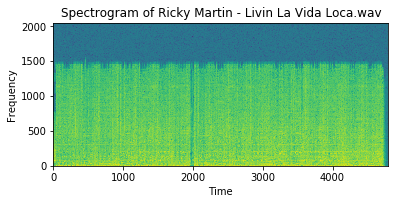

In [77]:
ricky.spectrogram()

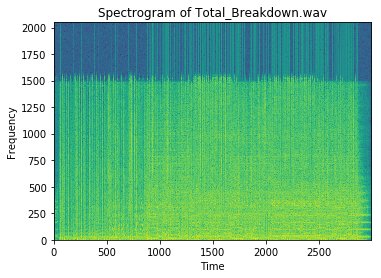

In [78]:
total.spectrogram()